# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement
In the competitive taxi booking industry, maximizing revenue is crucial for ensuring long-term sustainability and driver satisfaction. This project focuses on leveraging data-driven insights to improve drivers’ earnings.The analysis specifically explores the relationship between payment methods and fare amounts, with the objective of determining whether the choice of payment type has a significant impact on pricing.

### Objective
The primary objective of this project is to perform an A/B test to analyze the relationship between total fare and payment method. Using Python-based hypothesis testing along with descriptive statistics, the study aims to extract meaningful insights that can help improve drivers’ earnings.Specifically, the analysis focuses on determining whether there is a significant difference in fares between customers who pay using credit cards and those who pay with cash.

### Research Question
Is there a significant relationship between the total fare amount and the payment type? Additionally, can customers be encouraged to use payment methods that generate higher revenue for drivers without negatively affecting their overall experience?

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
taxi_data = pd.read_csv("/Users/kanhaiya/Downloads/DataScience/TechClasses/yellow_tripdata_2020-01.csv")

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


# Explortatory Data Analysis

In [5]:
taxi_data.shape

(6405008, 18)

In [6]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [7]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

The dataset contains multiple columns; however, based on the scope of this study, only a subset of features is relevant. Columns that do not contribute to the analysis are removed to simplify the dataset and improve clarity.

Since the analysis focuses on payment type, fare amount, and factors that may influence pricing, the dataset is filtered to include only the following variables: passenger count, trip distance, payment type, fare amount, and trip duration.

In [8]:
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [9]:
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [10]:
taxi_data.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [11]:
print('Missing data %',round(65441/taxi_data.shape[0]*100,2))

Missing data % 1.02


In [12]:
taxi_data.dropna(inplace = True)

In [13]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [14]:
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [15]:
taxi_data.drop_duplicates(inplace = True)

In [16]:
taxi_data.shape

(3007861, 5)

In [17]:
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [18]:
taxi_data['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

The analysis is limited to two payment types: card and cash, represented as 1 and 2 in the dataset. All other payment categories are excluded to maintain a clear focus on the comparison between these two methods.

Additionally, an initial review of the passenger count shows that trips with more than five passengers are rare, while entries with zero passengers are not valid. Therefore, the dataset is further filtered to include only trips with passenger counts ranging from 1 to 5.

In [19]:
taxi_data = taxi_data[taxi_data['payment_type']<3]

taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [20]:
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [21]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


A review of the summary statistics indicates the presence of negative values for trip distance, fare amount, and trip duration. Since these values are not realistic in this context, they are removed from the dataset before proceeding with the analysis.

In addition, a comparison of the median (50th percentile) and maximum values suggests the presence of potential outliers, particularly on the higher end. These extreme values are handled appropriately to prevent them from distorting the results and to ensure a more reliable analysis.

In [22]:
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

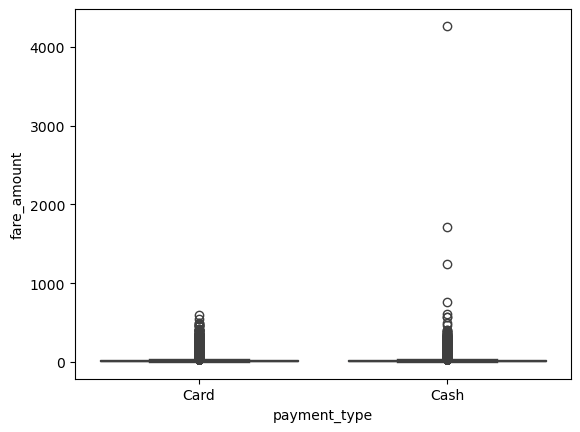

In [23]:
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [24]:
cols = ['trip_distance', 'fare_amount', 'duration']

for col in cols:
    q1 = taxi_data[col].quantile(0.25)
    q3 = taxi_data[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    taxi_data = taxi_data[(taxi_data[col] >= lower) & (taxi_data[col] <= upper)]

This section explores the relationship between payment type and passenger behavior, particularly in terms of trip distance and fare amount. The goal is to examine whether the distribution of payment methods varies across different fare ranges or trip distances.

To analyze this, histograms are used to visualize how passengers paying by card and cash are distributed. This helps provide a clearer understanding of how fare amounts and trip distances are associated with each payment method, offering useful insights for stakeholders.

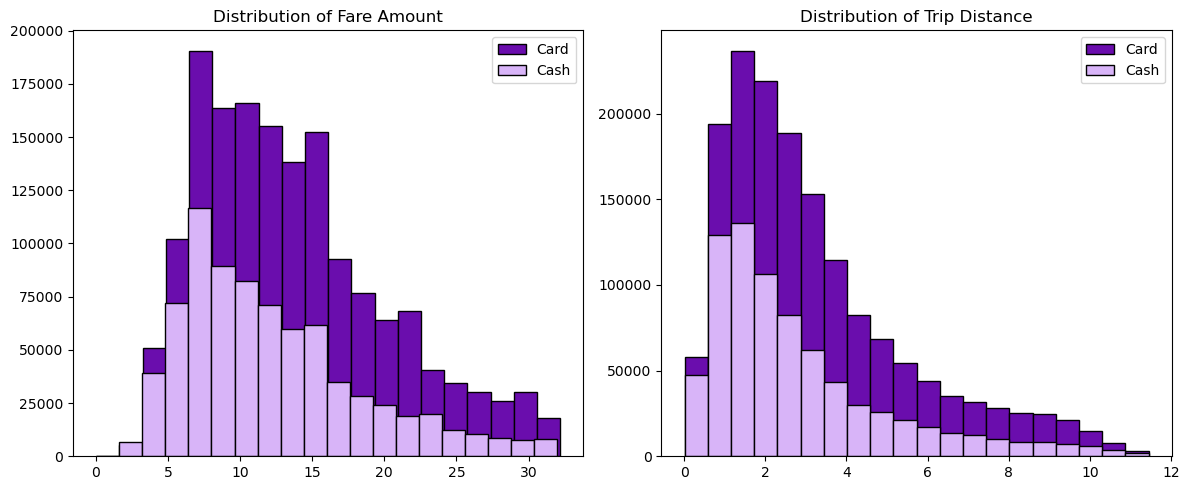

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount')

plt.hist(
    taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount'],bins=20, edgecolor='black', color='#6A0DAD', label='Card'
)
plt.hist(
    taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount'],bins=20, edgecolor='black', color='#D8B4F8', label='Cash'
)

plt.legend()

plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')

plt.hist(
    taxi_data[taxi_data['payment_type'] == 'Card']['trip_distance'],bins=20, edgecolor='black', color='#6A0DAD', label='Card'
)
plt.hist(
    taxi_data[taxi_data['payment_type'] == 'Cash']['trip_distance'],bins=20, edgecolor='black', color='#D8B4F8', label='Cash'
)

plt.legend()
plt.tight_layout()
plt.show()

summary_stats = taxi_data.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})

summary_stats

To understand passenger preferences for payment methods, we analyze the proportion of each payment type. This helps identify how frequently customers choose between card and cash.

A pie chart is used to present this distribution, providing a clear and intuitive view of how the two payment methods are represented among passengers.

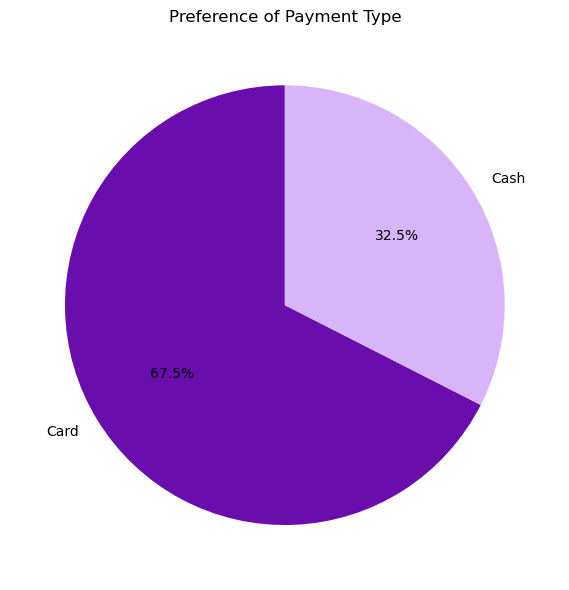

In [26]:
payment_counts = taxi_data['payment_type'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.title('Preference of Payment Type')

plt.pie(
    payment_counts,labels=payment_counts.index,startangle=90,autopct='%1.1f%%',colors=['#6A0DAD', '#D8B4F8']
)

plt.tight_layout()
plt.show()

Next, we analyze how payment preferences vary with passenger count. The objective is to determine whether the choice of payment method changes depending on the number of passengers in a trip.

To support this analysis, a stacked bar chart is used to compare the percentage distribution of payment types across different passenger counts. This visualization helps highlight any noticeable shifts in payment behavior as the number of passengers increases.

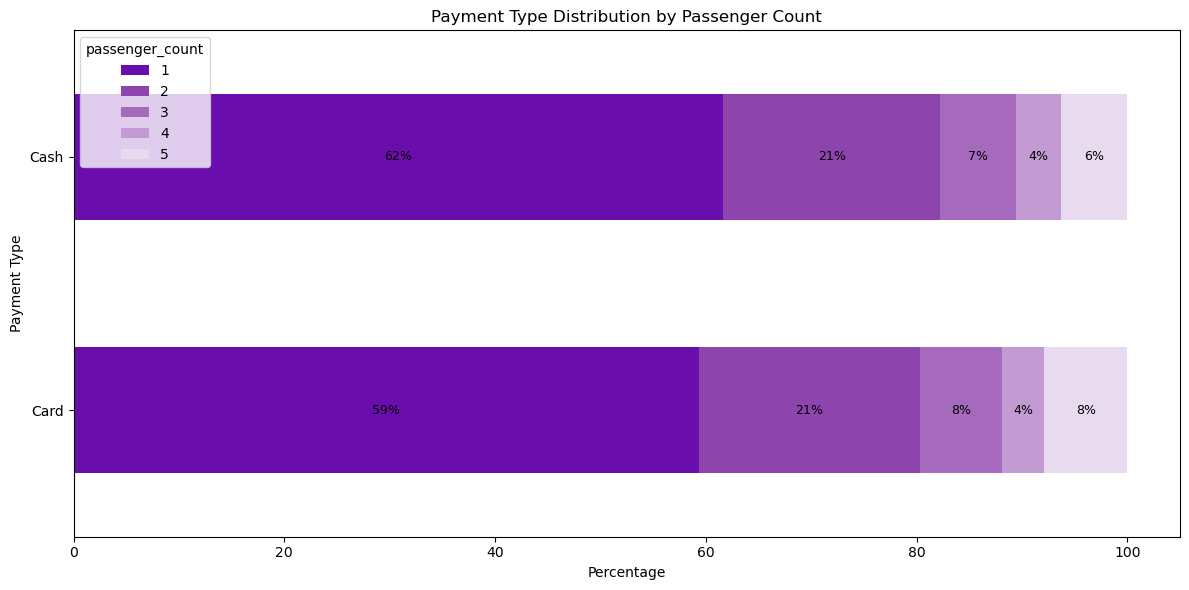

In [27]:
passenger_dist = (taxi_data.groupby(['payment_type', 'passenger_count']).size().reset_index(name='count')
)

passenger_dist['perc'] = passenger_dist.groupby('payment_type')['count'] \
.transform(lambda x: (x / x.sum()) * 100)

df = passenger_dist.pivot(index='payment_type',columns='passenger_count',values='perc').fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='barh',stacked=True,ax=ax,color=['#6A0DAD', '#8E44AD', '#A569BD', '#C39BD3', '#E8DAEF']
)

ax.set_title('Payment Type Distribution by Passenger Count')
ax.set_xlabel('Percentage')
ax.set_ylabel('Payment Type')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        x, y = p.get_xy()
        ax.text(x + width / 2,y + p.get_height() / 2,f'{width:.0f}%',ha='center',va='center',fontsize=9
        )

plt.tight_layout()
plt.show()

# Hypothesis Testing

To select an appropriate statistical test, the first step is to assess whether the fare amount follows a normal distribution. Although the histogram suggests deviations from normality, this is further evaluated using a QQ (quantile–quantile) plot.

A QQ plot helps determine how closely the distribution of fare amounts (for each payment type) aligns with a normal distribution. If the data points lie near the diagonal reference line, it indicates that the assumption of normality is reasonably satisfied.

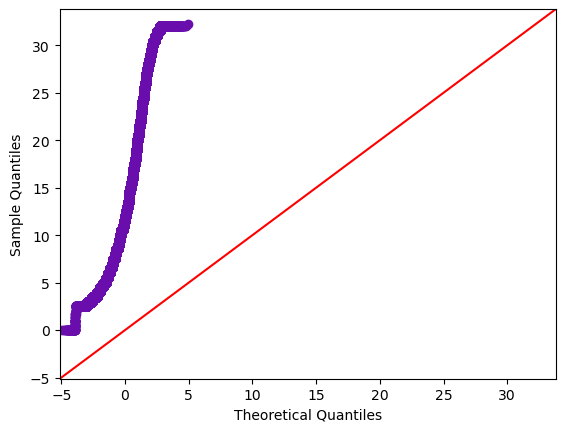

In [28]:
fig = sm.qqplot(
    taxi_data['fare_amount'],line='45',marker='o',markerfacecolor='#6A0DAD',markeredgecolor='#6A0DAD'
)

plt.show()

The QQ plot shows that the data points do not closely follow the 45-degree reference line, indicating that the fare amounts are not normally distributed. As a result, using a Z-test is not appropriate in this case.

Instead, a T-test is used, as it does not require knowledge of the population standard deviation and is suitable for a wide range of sample sizes. This makes it a practical choice for real-world datasets.

In the context of the NYC Yellow Taxi Trip data, where the population parameters are unknown, the T-test provides a reliable method for comparing the mean fare amounts between different payment types.

**Null Hypothesis (H₀)**: There is no significant difference in the average fare between customers who pay using credit cards and those who pay with cash.

**Alternative Hypothesis (H₁)**: There is a significant difference in the average fare between customers who pay using credit cards and those who pay with cash.

In [29]:
card_fare = taxi_data.loc[taxi_data['payment_type'] == 'Card', 'fare_amount']
cash_fare = taxi_data.loc[taxi_data['payment_type'] == 'Cash', 'fare_amount']

t_stat, p_value = stats.ttest_ind(card_fare, cash_fare, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")

T-statistic: 165.5992
P-value: 0.0000

Reject the null hypothesis


Since the p-value is lower than the chosen significance level (0.05), the null hypothesis is rejected.

This indicates that there is a statistically significant difference in the average fare amounts between customers who pay using credit cards and those who pay with cash.

From a business perspective, the results suggest that encouraging customers to use credit cards could lead to higher revenue for taxi drivers.